In [1]:
# Dependencies
import pandas as pd
import requests
import json
import csv
import prettyprint as pp
import matplotlib.pyplot as plt
# from apiclient import errors

# Google developer API key
from api_keys import gkey

In [2]:
world_happiness = "Selected_cities_2020.csv"
location_types = "Location_Types.csv"
world_happiness_df = pd.read_csv(world_happiness, encoding="UTF-8")
location_types_df = pd.read_csv(location_types, encoding="UTF-8")
 # base url
places_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

In [3]:
health_location_types = location_types_df.loc[location_types_df["sub_type"]
                                               =="Health",:]
health_types_list = []
health_location_types.reset_index(inplace=True)
for i in range(len(health_location_types)):
    health_types_list.append(health_location_types.loc[i,"location_types"])

health_types_list


['dentist', 'doctor', 'gym', 'hospital', 'pharmacy', 'physiotherapist']

In [4]:
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
coord=[]
cities=["Helsinki","Stockholm","Washington D.C.","Brussels","Montevideo",
        "Bucharest", "Islamabad", "Accra","Bhagdad","Kampala","Gaborone"]
for city in cities:
    params = {"address": city, "key":gkey}
    response = requests.get(base_url, params=params)
    places_data = response.json()   
    lat=places_data["results"][0]["geometry"]["location"]["lat"]
    long=places_data["results"][0]["geometry"]["location"]["lng"]
    coord.append(f"{lat},{long}")
coord

['60.16985569999999,24.9383791',
 '59.32932349999999,18.0685808',
 '38.9071923,-77.0368707',
 '50.8503396,4.3517103',
 '-34.9011127,-56.16453139999999',
 '44.4267674,26.1025384',
 '33.6844202,73.04788479999999',
 '5.6037168,-0.1869644',
 '33.315241,44.3660671',
 '0.3475964,32.5825197',
 '-24.6282079,25.9231471']

In [5]:
#Use for loop to calculate hospitals

target_type ="hospital"
count_hospitals=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(places_url, params=params).json()
    count_hospitals.append(len(places_data["results"]))
    
count_hospitals

[3, 2, 1, 2, 9, 3, 0, 1, 4, 3, 0]

In [6]:
#Use for loop to calculate dentists

target_type ="dentist"
count_dentists=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(places_url, params=params).json()
    count_dentists.append(len(places_data["results"]))

count_dentists

[20, 20, 20, 8, 18, 18, 1, 4, 8, 4, 2]

In [7]:
health_types_list

['dentist', 'doctor', 'gym', 'hospital', 'pharmacy', 'physiotherapist']

In [8]:
#Use for loop to calculate doctors
target_type ="doctor"
count_doctors=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(places_url, params=params).json()
    count_doctors.append(len(places_data["results"]))

count_doctors

[20, 20, 20, 20, 20, 20, 7, 9, 20, 6, 7]

In [9]:
#Use for loop to calculate gyms
target_type ="gym"
count_gyms=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(places_url, params=params).json()
    count_gyms.append(len(places_data["results"]))

count_gyms

[20, 20, 20, 15, 20, 19, 4, 7, 3, 3, 1]

In [10]:

#Use for loop to calculate pharmacies
target_type ="pharmacy"
count_pharmacies=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(places_url, params=params).json()
    count_pharmacies.append(len(places_data["results"]))

count_pharmacies

[20, 20, 20, 20, 20, 20, 4, 10, 20, 10, 4]

In [11]:

#Use for loop to calculate physiotherapists
target_type ="physiotherapist"
count_physio=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(places_url, params=params).json()
    count_physio.append(len(places_data["results"]))

    
count_physio

[9, 5, 17, 6, 0, 2, 0, 1, 0, 4, 2]

In [12]:

health_dict = {"Cities":cities,"Hospitals":count_hospitals,"Doctors":count_doctors,"Dentists":count_dentists,
              "Gyms":count_gyms,"Pharmacies":count_pharmacies,"Physiotherapists":count_physio}

health_data_df = pd.DataFrame(health_dict)


In [13]:
#sum the totals of each row
sum_rows= health_data_df.sum(axis=1)


In [14]:
#Add to dataframe
health_data_df["Total"]=sum_rows
health_data_df

,Cities,Hospitals,Doctors,Dentists,Gyms,Pharmacies,Physiotherapists,Total
0,Helsinki,3,20,20,20,20,9,92
1,Stockholm,2,20,20,20,20,5,87
2,Washington D.C.,1,20,20,20,20,17,98
3,Brussels,2,20,8,15,20,6,71
4,Montevideo,9,20,18,20,20,0,87
5,Bucharest,3,20,18,19,20,2,82
6,Islamabad,0,7,1,4,4,0,16
7,Accra,1,9,4,7,10,1,32
8,Bhagdad,4,20,8,3,20,0,55
9,Kampala,3,6,4,3,10,4,30


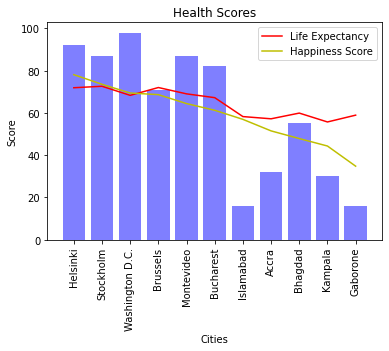

In [15]:
health_score = health_data_df["Total"]
x_cities = health_data_df["Cities"]
happiness_score = world_happiness_df["Ladder score"]*10
life_expectancy = world_happiness_df["Healthy life expectancy"]
plt.bar(x_cities,health_score,color="b",alpha=0.5,align="center")
plt.plot(x_cities,life_expectancy,color="r",label="Life Expectancy")
plt.plot(x_cities,happiness_score,color="y",label="Happiness Score")
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.title("Health Scores")
plt.xlabel("Cities")
plt.ylabel("Score")
plt.show()

In [16]:
#Combine all data using csv files
entertainment_location_types = "entertainment_df.csv"
ent_locations_df = pd.read_csv(entertainment_location_types, encoding="UTF-8")            
ent_locations_total= ent_locations_df.drop(columns=['Total'])       
health_locations_total = health_data_df.drop(columns=['Total'])
all_locations_total= pd.merge(health_locations_total,ent_locations_total,how="left",on="Cities")
education_location_types = "education_df.csv"
ed_locations_df = pd.read_csv(education_location_types, encoding="UTF-8") 
ed_locations_df = ed_locations_df.drop(columns=['Total'])
transportation_location_types = "transportation_df.csv"
trans_locations_df = pd.read_csv(transportation_location_types, encoding="UTF-8") 
trans_locations_df = trans_locations_df.drop(columns=['Total'])
all_locations_total = pd.merge(all_locations_total,trans_locations_df,how="left",on="Cities")
all_locations_total = pd.merge(all_locations_total,ed_locations_df,how="left",on="Cities")

#sum total data
sum_rows= all_locations_total.sum(axis=1)
all_locations_total["Total"]=sum_rows

all_locations_total

,Cities,Hospitals,Doctors,Dentists,Gyms,Pharmacies,Physiotherapists,Unnamed: 0,Stadiums,Movie Theathers,...,Subway Stations,Train Stations,Transit Stations,Libraries,Museums,Primary Schools,Secondary Schools,Schools,Universities,Total
0,Helsinki,3,20,20,20,20,9,0.0,5.0,12.0,...,17,10,10,16,20,2,10,20,15,318.0
1,Stockholm,2,20,20,20,20,5,1.0,6.0,12.0,...,8,10,10,15,20,2,8,20,3,294.0
2,Washington D.C.,1,20,20,20,20,17,NaN,NaN,NaN,...,11,5,10,20,17,1,4,20,19,226.0
3,Brussels,2,20,8,15,20,6,3.0,1.0,12.0,...,8,10,10,20,20,2,7,20,4,281.0
4,Montevideo,9,20,18,20,20,0,4.0,2.0,4.0,...,0,1,10,2,20,8,12,20,10,235.0
5,Bucharest,3,20,18,19,20,2,NaN,NaN,NaN,...,3,10,10,16,20,1,11,20,3,198.0
6,Islamabad,0,7,1,4,4,0,6.0,1.0,0.0,...,4,0,0,2,1,3,0,18,14,81.0
7,Accra,1,9,4,7,10,1,7.0,1.0,1.0,...,0,0,0,1,1,5,5,20,4,92.0
8,Bhagdad,4,20,8,3,20,0,8.0,1.0,1.0,...,0,0,0,8,4,7,4,20,6,129.0
9,Kampala,3,6,4,3,10,4,9.0,0.0,1.0,...,0,0,2,2,3,12,4,20,4,100.0


Text(0, 0.5, 'Score')

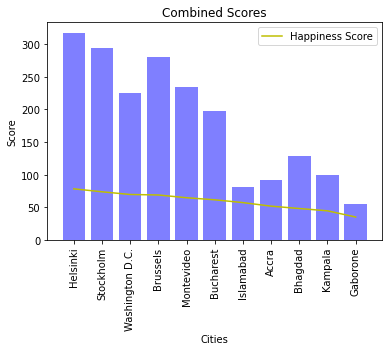

In [17]:
# graph totals
all_score = all_locations_total["Total"]
x_cities = all_locations_total["Cities"]

plt.bar(x_cities,all_score,color="b",alpha=0.5,align="center")

plt.plot(x_cities,happiness_score,color="y",label="Happiness Score")
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.title("Combined Scores")
plt.xlabel("Cities")
plt.ylabel("Score")